In [165]:
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle

In [166]:
#Importing(reading) the dataset

data = pd.read_csv('https://raw.githubusercontent.com/harshlangade19/Data_Analysis_MS_Engage_2022/main/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [168]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [169]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [170]:
#Dropping unneccessary feature columns from the dataset

data = data.drop(['car name','origin','model year'],axis=1)
#converting object datatype to numeric
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')    

<AxesSubplot:>

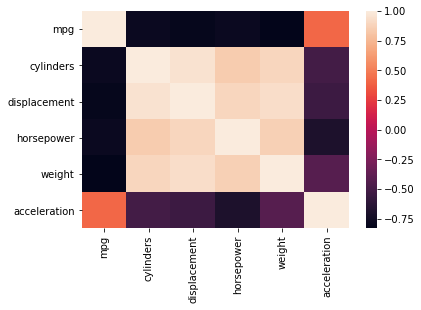

In [171]:
#Checking correlationn of 'horsepower'with other features

value = data[data['horsepower'].isnull()].index.tolist()
data_corr = data.corr()
sns.heatmap(data_corr)

In [172]:
#Determining a factor to fill null values 

hp_avg = data['horsepower'].mean()
disp_avg = data['displacement'].mean()
factor = hp_avg / disp_avg

In [173]:
#Filling null values in 'horsepower' feature column

for i in value:
    data['horsepower'].fillna(value=(data.iloc[i][2])*factor,inplace=True)

In [174]:
#Seperating input features(for model) and label column

X = data.drop('mpg',axis=1)
y = data['mpg']
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [175]:
#Seperating the data into training data and test data

X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.3, random_state=42)

In [176]:
#Implementing feature scaling on the data

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_cv)

array([[-8.1670606e-01, -9.0943313e-01, -1.2484125e+00, -1.2723670e+00,
         7.3199713e-01],
       [-8.1670606e-01, -6.4596099e-01, -6.3597691e-01, -3.2879925e-01,
         1.1710129e+00],
       [ 3.2954806e-01,  3.7158656e-01, -1.4131750e-01, -3.1856778e-01,
        -8.7772596e-01],
       [ 1.4758023e+00,  1.1529177e+00,  1.0364431e+00,  1.1661304e+00,
        -8.0455679e-01],
       [ 1.4758023e+00,  1.1529177e+00,  1.0364431e+00,  1.5037684e+00,
        -3.2895669e-01],
       [-8.1670606e-01, -8.5492164e-01, -4.2398003e-01, -9.2563421e-01,
         4.0273568e-01],
       [-8.1670606e-01, -4.6425605e-01, -3.2975918e-01, -5.5960387e-02,
         3.6615092e-01],
       [ 1.4758023e+00,  2.2613177e+00,  2.5675318e+00,  2.0699091e+00,
        -1.6094184e+00],
       [ 1.4758023e+00,  6.2597346e-01,  9.4234616e-02,  1.3025498e+00,
         1.3173512e+00],
       [ 3.2954806e-01,  8.0858685e-02, -1.2500652e+00, -4.4592101e-02,
         5.8565879e-01],
       [ 1.4758023e+00,  1.807

In [177]:
#Building ml models for prediciton and choosing the best one 

#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50,random_state=10)
#from sklearn.svm import SVR
#regressor = SVR(kernel='rbf')

In [178]:
#Fitting the model on training data

regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=10)

In [179]:
#Predicting the required output using test data

predictions = regressor.predict(X_cv)
predictions

array([37.9       , 26.95800011, 20.35799999, 14.24      , 15.5239999 ,
       27.45799995, 24.23799976, 11.52      , 18.36000004, 22.85400002,
       13.48      , 33.14999947, 33.21199989, 14.7       , 25.71      ,
       13.43      , 25.22200005, 19.82200005, 14.32      , 35.63799957,
       33.43599991, 20.19000023, 19.23799999, 28.76599998, 17.00800022,
       30.53800003, 27.64799999, 26.78599998, 18.66400009, 12.58      ,
       24.18799995, 30.98599991, 16.31600006, 26.07600006, 35.64599983,
       13.68      , 25.02200001, 17.43600018, 13.44799995, 27.28399998,
       24.64199986, 33.12999954, 21.63200016, 11.16      , 24.68600002,
       28.36000004, 32.19600014, 24.45600006, 26.64200001, 31.67999977,
       23.68200012, 32.38799957, 31.73200039, 12.26      , 24.29399982,
       14.48      , 13.79      , 24.74000011, 26.59600002, 20.11200008,
       14.83600002, 37.9       , 25.39400009, 21.87799992, 19.9420002 ,
       25.79200012, 24.45599983, 31.65999977, 33.25999977, 16.12

In [180]:
#Evaluating error metrics

mae = mean_absolute_error(y_cv,predictions)
mse = mean_squared_error(y_cv,predictions)
rmse = np.sqrt(mse)
print("Mean Absolute Error = ",mae)
print("Mean Squared Error = ",mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error =  2.62875000445048
Mean Squared Error =  12.774178762634163
Root Mean Squared Error =  3.5740983146290426


In [181]:
#Creating a new,random input set

x = np.array([[8,340,145,3600,12,]])
x = x.astype(float)
x

array([[   8.,  340.,  145., 3600.,   12.]])

In [182]:
#Predicting output for above defined input

y = regressor.predict(x)
y

array([15.12600006])

In [183]:
# Saving model to disk

pickle.dump(regressor, open('model_mpg.pkl','wb'))

In [184]:
# Loading model to compare the results

model = pickle.load(open('model_mpg.pkl','rb'))
print(model.predict([[8, 340, 145, 3600, 12]])) 

[15.12600006]
